In [1]:
from pyvis import network as net
import networkx as nx

BLACK = "#000000"
RED = "#ff0000" 

In [2]:
g = net.Network(notebook=True)
nxg = nx.dorogovtsev_goltsev_mendes_graph(n=4)
g.from_nx(nxg)
g.repulsion(node_distance=75)
g.toggle_physics(False)
#g.set_edge_smooth("diagonalCross")
g.nodes[6]['color'] = BLACK
g.show("example.html")

In [30]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay
import matplotlib.pyplot as plt

In [101]:
points = np.random.random_sample((25, 2))

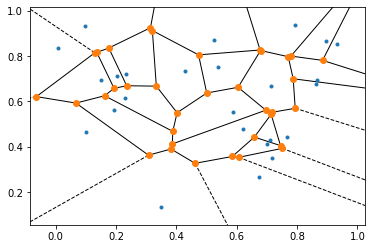

In [102]:
vor = Voronoi(points, furthest_site=False)
fig = voronoi_plot_2d(vor, show_vertices=True)
plt.show()

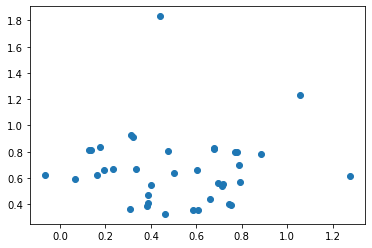

In [103]:
plt.plot(vor.vertices[:,0], vor.vertices[:,1], 'o')
plt.show()

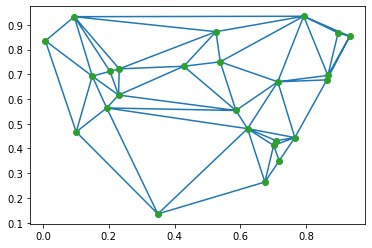

In [104]:
tri = Delaunay(points)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [49]:
vor.point_region

array([25, 15, 24,  8, 18,  0, 14,  5, 21,  4, 11, 22, 20, 16,  9, 12,  2,
       13, 19, 17,  7,  6, 10, 23,  3], dtype=int64)

In [100]:
vor.regions

[[3, 1, 0, 2],
 [],
 [-1, 2, 0],
 [4, 3, 2, -1],
 [9, 7, 5, 6, 8],
 [7, 4, 3, 1, 5],
 [6, -1, 0, 1, 5],
 [8, -1, 6],
 [9, -1, 4, 7],
 [9, -1, 8]]

In [99]:
vor.vertices

array([[ 0.87169589,  0.37615744],
       [ 0.7454535 ,  0.35696498],
       [ 0.74377642,  0.84112888],
       [ 0.558057  ,  0.52841661],
       [ 0.44851885,  0.55827108],
       [ 0.41119444,  0.04943518],
       [ 0.20302327, -0.40304568],
       [ 0.33494262,  0.49015829],
       [ 0.16645111,  0.46890953],
       [ 0.26532345,  0.51241727]])

In [59]:
vor.vertices < 0.0

array([[False,  True],
       [ True, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

In [54]:
points

array([[0.28018238, 0.16308928],
       [0.69135003, 0.5176573 ],
       [0.26385828, 0.39906102],
       [0.85097558, 0.22896924],
       [0.80664651, 0.8527716 ],
       [0.06474243, 0.15124501],
       [0.73767448, 0.68489132],
       [0.81714948, 0.0988736 ],
       [0.4622931 , 0.05003464],
       [0.48312422, 0.38501   ],
       [0.38552947, 0.86537835],
       [0.56554415, 0.23473941],
       [0.39377905, 0.14771067],
       [0.95692415, 0.46323872],
       [0.96599206, 0.21732531],
       [0.19840791, 0.83007736],
       [0.93390235, 0.9166665 ],
       [0.34519684, 0.70276776],
       [0.43354966, 0.18604783],
       [0.65441376, 0.69390266],
       [0.65039558, 0.14112628],
       [0.82522493, 0.07424681],
       [0.31559736, 0.72412481],
       [0.49766978, 0.34772648],
       [0.55988601, 0.95230009]])

In [193]:
size = 5

border_points = np.array((size, 4, 2))

# set up the border points
for i in range(size):
    step = (1 / (size - 1) * i)
    border_points[i] = np.array([
        [0., step],
        [1., step],
        [step, 0.],
        [step, 1.]
    ])

# sample the inner points
points = border_points.flatten()
points

IndexError: too many indices for array

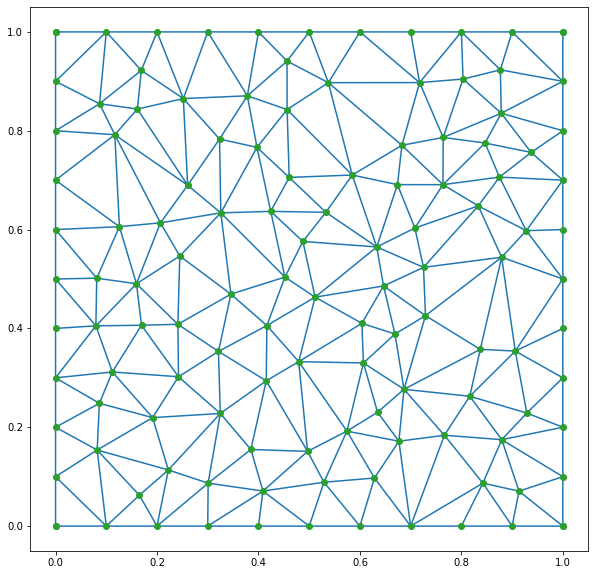

In [190]:
from scipy.spatial.distance import cdist

points = []
sz = 11
min_dist = 3 / (sz * 4)

# for i in range(sz):
#     step = (1 / (sz -1) * i)
#     points.append([0., step])
#     points.append([1., step])
#     points.append([step, 0.])
#     points.append([step, 1.])

# points = np.array(points)




# TODO add inner points with min distance from existing points
ips = []
ipc = sz**2 - ((sz - 1) * 4)
for i in range(ipc):
    while(True):
        p = np.random.random_sample((1, 2))
        dist = cdist(points, p, metric="euclidean").min()
        if dist > min_dist:
            points = np.concatenate([points, p])
            break

#inner_points = np.random.random_sample((15, 2))
#points = np.concatenate([outer_points, inner_points])

tri = Delaunay(points)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

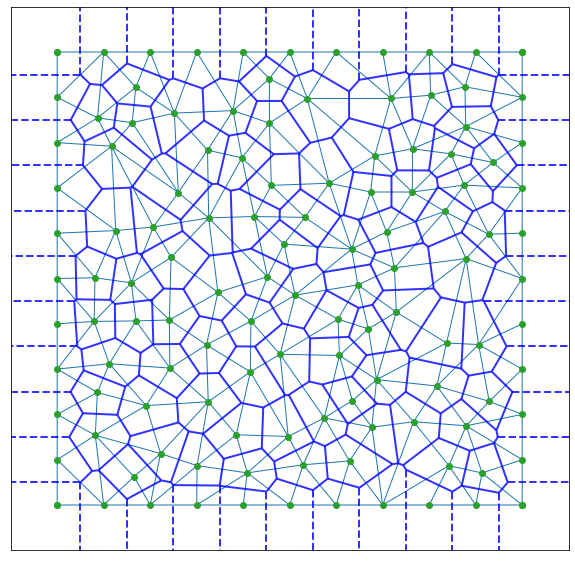

In [191]:
vor = Voronoi(points, furthest_site=False)
#fig=plt.figure(figsize=(10, 15), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams['figure.figsize'] = [10, 10]
fig = voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='blue', line_width=2, line_alpha=0.8, point_size=2)
plt.triplot(points[:,0], points[:,1], tri.simplices, linewidth=1)
plt.plot(points[:,0], points[:,1], 'o')

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

In [141]:
from scipy.sparse import dok_matrix

pc = points.shape[0]

adj = dok_matrix((pc, pc), dtype=np.int8)
for s in tri.simplices:
    for i1 in range(3):
        i2 = (i1 + 1) % 3
        v1 = s[i1]
        v2 = s[i2]
        adj[v1, v2] = 1
        adj[v2, v1] = 1
adj = adj.tocoo()
adj.row, adj.col

(array([10, 14, 14, 24, 24, 10, 25, 23, 23, 24, 24, 25,  4, 23, 23,  8,  8,
         4, 23, 12, 12,  8,  9, 26, 26, 24, 24,  9, 27, 10, 24, 27, 23, 27,
        14, 28, 28, 24, 14,  1,  1, 28, 11,  7,  7, 25, 25, 11, 20, 25, 24,
        20, 26, 20, 20, 11, 13, 26,  9, 13, 21, 23,  4, 21, 21, 27,  4,  0,
         0, 21,  5,  9, 24,  5, 28,  5,  1,  5, 12, 22, 22,  3,  3, 12, 22,
         7,  7,  3, 22, 25, 22, 23, 20, 15, 15, 11, 15, 13, 13, 17, 17, 15,
        26, 15,  6, 21,  0,  6, 27,  6,  6, 10], dtype=int32),
 array([14, 10, 24, 14, 10, 24, 23, 25, 24, 23, 25, 24, 23,  4,  8, 23,  4,
         8, 12, 23,  8, 12, 26,  9, 24, 26,  9, 24, 10, 27, 27, 24, 27, 23,
        28, 14, 24, 28,  1, 14, 28,  1,  7, 11, 25,  7, 11, 25, 25, 20, 20,
        24, 20, 26, 11, 20, 26, 13, 13,  9, 23, 21, 21,  4, 27, 21,  0,  4,
        21,  0,  9,  5,  5, 24,  5, 28,  5,  1, 22, 12,  3, 22, 12,  3,  7,
        22,  3,  7, 25, 22, 23, 22, 15, 20, 11, 15, 13, 15, 17, 13, 15, 17,
        15, 26, 21,  6,  

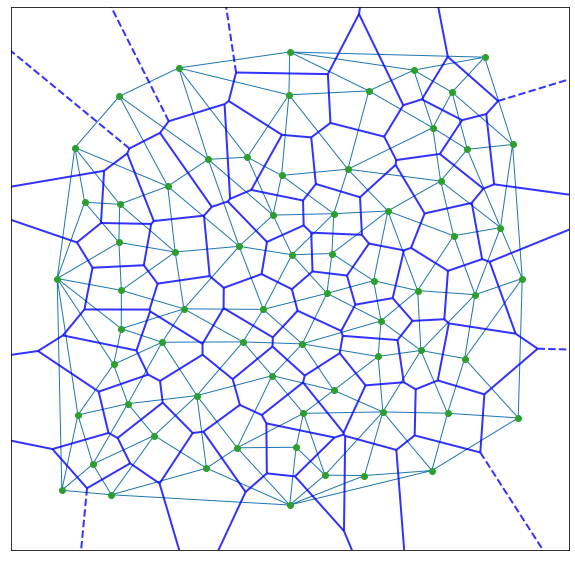

In [189]:
from scipy.spatial.distance import cdist

points = []
sz = 10
min_dist = 3 / (sz * 4)

# for i in range(sz):
#     step = (1 / (sz -1) * i)
#     points.append([0., step])
#     points.append([1., step])
#     points.append([step, 0.])
#     points.append([step, 1.])

# points = np.array([
#     [-0.1, 0.5],
#     [1.1, 0.5],
#     [0.5, -0.1],
#     [0.5, 1.1]
# ])
points = np.array([
    [0.0, 0.5],
    [1.0, 0.5],
    [0.5, 0.0],
    [0.5, 1.0]
])

ips = []
ipc = sz**2 - ((sz - 1) * 4)
for i in range(ipc):
    while(True):
        p = np.random.random_sample((1, 2))
        dist = cdist(points, p, metric="euclidean").min()
        if dist > min_dist:
            points = np.concatenate([points, p])
            break

tri = Delaunay(points)
vor = Voronoi(points, furthest_site=False)

plt.rcParams['figure.figsize'] = [10, 10]
fig = voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='blue', line_width=2, line_alpha=0.8, point_size=2)
plt.triplot(points[:,0], points[:,1], tri.simplices, linewidth=1)
plt.plot(points[:,0], points[:,1], 'o')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()